# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

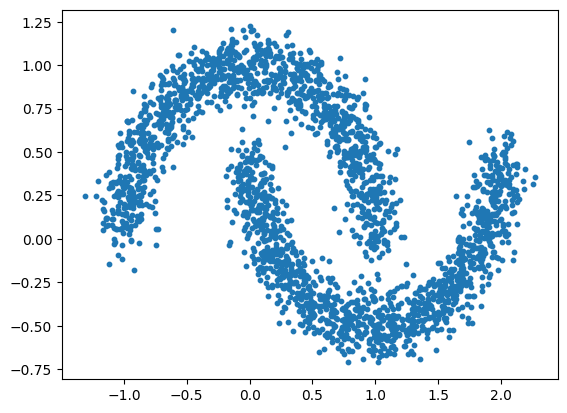

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class
LAM = LAMINAR.LAMINAR(data, epochs=100, k_neighbours=25)

Epoch 53 | Loss: 1.1574:  52%|█████▏    | 52/100 [03:10<02:55,  3.66s/it]
H:\Uni\Master\Thesis\NFLAM\NFLAM\LAMINAR\LAMINAR\LAMINAR.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  self.cov_matrices = torch.tensor(cov_matrices, dtype=torch.float32).to(self.device)


In [5]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

array([[   0,  439, 1659,   71, 1174],
       [   2,  285, 1887, 1445, 1509],
       [   5, 1919, 2128,  393,  409]], dtype=int64)

In [6]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.057371824397705495


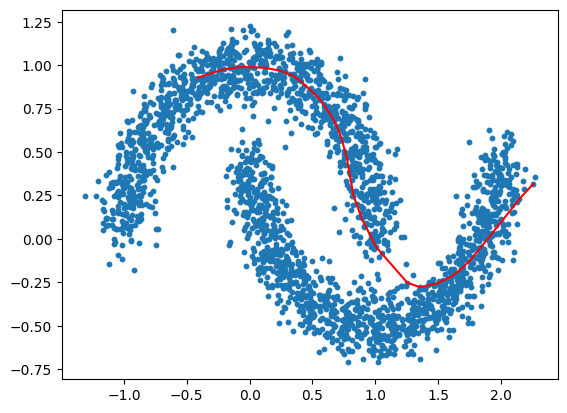

In [7]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

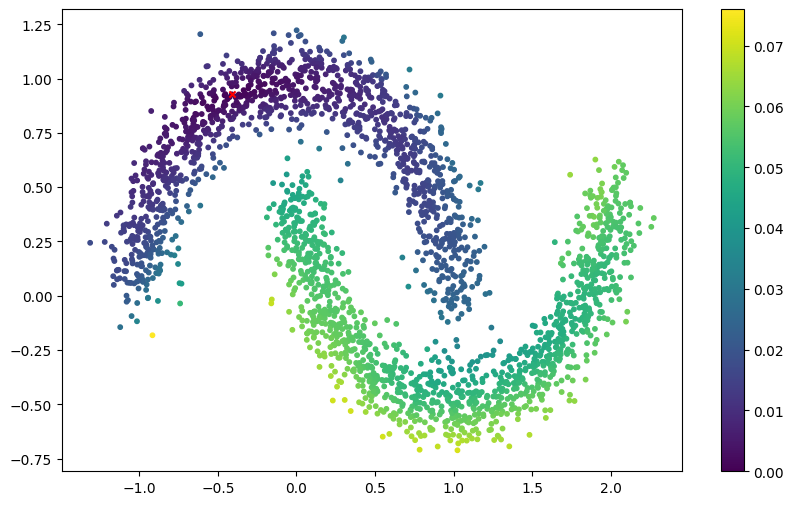

In [8]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
